In [483]:
import pandas as pd

In [484]:
import numpy as np

In [485]:
import matplotlib.pyplot as plt

In [486]:
import seaborn as sns

In [487]:
from sklearn import linear_model

In [488]:
from sklearn.model_selection import train_test_split

In [489]:
from sklearn.metrics import accuracy_score,classification_report

In [490]:
from sklearn.tree import DecisionTreeClassifier


In [491]:
import warnings

In [492]:
warnings.filterwarnings("ignore")

In [493]:
tested = pd.read_csv('tested.csv')

In [494]:
tested.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [495]:
tested.shape

(418, 12)

In [496]:
tested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [497]:
tested.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [498]:
tested.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [499]:
tested.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [500]:
tested.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [501]:
tested.drop_duplicates(inplace=True)

In [502]:
tested.duplicated().sum()

0

In [503]:
tested.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [504]:
tested.nunique

<bound method DataFrame.nunique of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                    

In [505]:
total = tested.isnull().sum().sort_values(ascending=False)
percent_1 = tested.isnull().sum()/tested.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Survived,0,0.0


In [506]:
tested.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [507]:
print((tested['Survived']==1).sum())
print((tested['Survived']==0).sum())

152
266


In [508]:
diffrent_class=tested['Pclass'].value_counts()
diffrent_class

3    218
1    107
2     93
Name: Pclass, dtype: int64

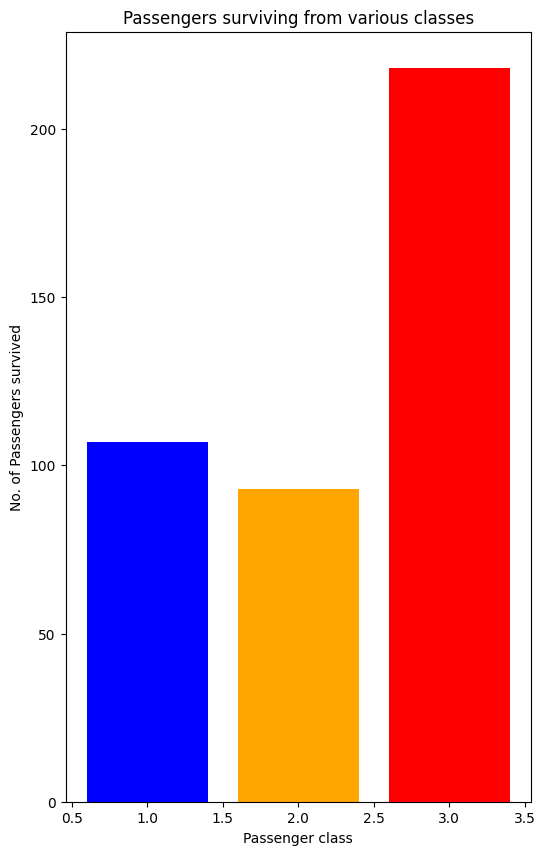

In [509]:
plt.figure(figsize=(6,10))
plt.xlabel("Passenger class")
plt.ylabel("No. of Passengers survived")
plt.title("Passengers surviving from various classes")
plt.bar(diffrent_class.keys(),diffrent_class.values,color=['red','blue','orange'])
plt.show()

In [510]:
diffrent_age_group=tested['Age'].value_counts()
diffrent_age_group

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

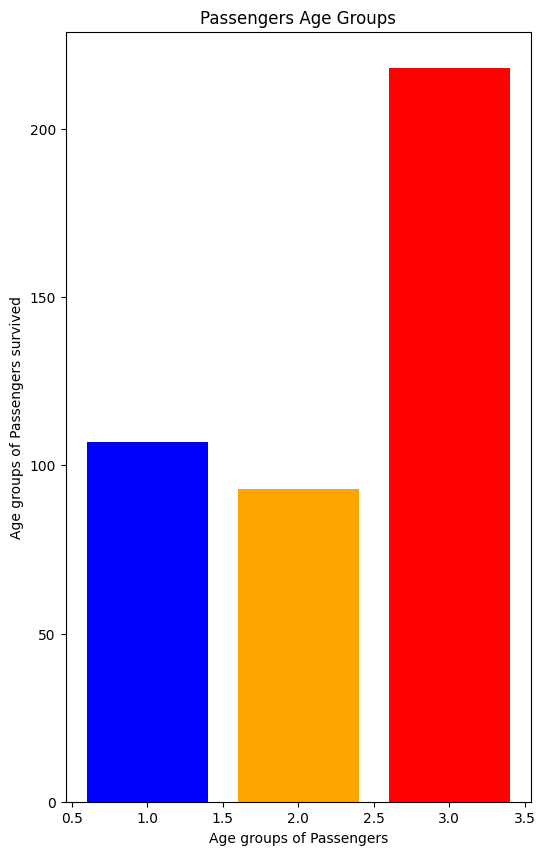

In [511]:
plt.figure(figsize=(6,10))
plt.xlabel("Age groups of Passengers")
plt.ylabel("Age groups of Passengers survived")
plt.title("Passengers Age Groups")
plt.bar(diffrent_class.keys(),diffrent_class.values,color=['red','blue','orange'])
plt.show()

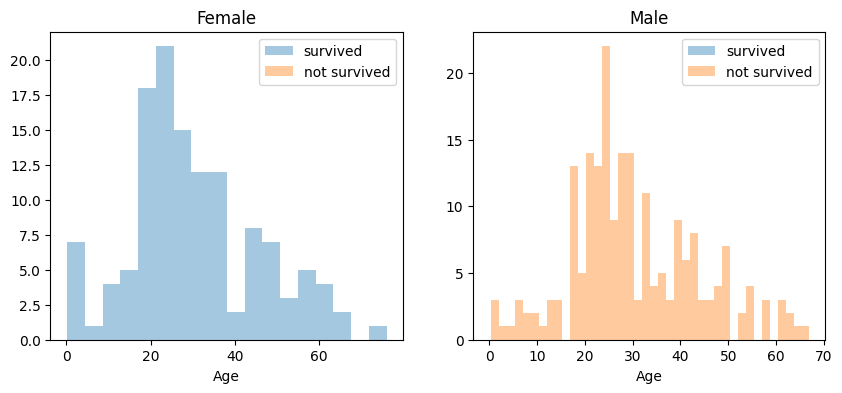

In [512]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women =tested[tested['Sex']=='female']
men = tested[tested['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


In [513]:
diffrent_age_group=tested['Age'].value_counts()
diffrent_age_group

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

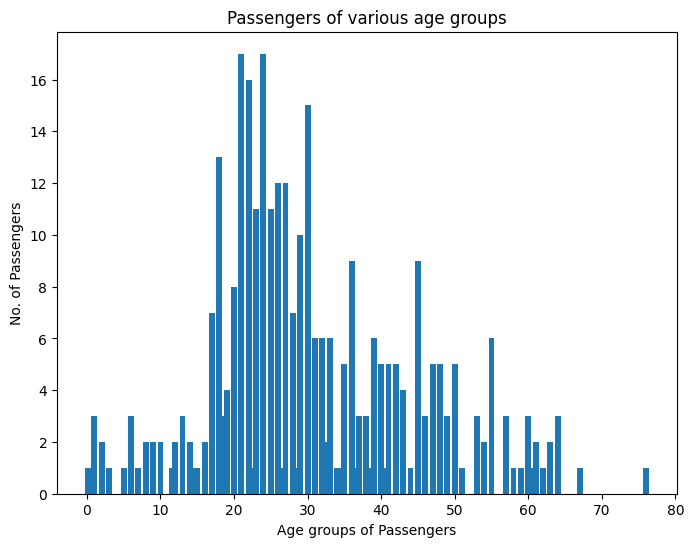

In [514]:
plt.figure(figsize=(8,6))
plt.xlabel("Age groups of Passengers")
plt.ylabel("No. of Passengers")
plt.title("Passengers of various age groups")
plt.bar(diffrent_age_group.keys(),tested['Age'].value_counts().values)
plt.show()

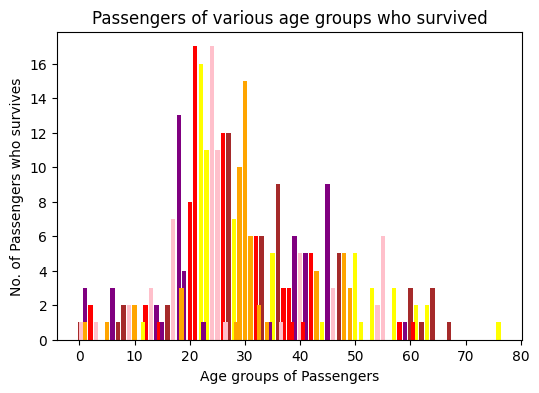

In [515]:
plt.figure(figsize=(6,4))
plt.xlabel("Age groups of Passengers")
plt.ylabel("No. of Passengers who survives")
plt.title("Passengers of various age groups who survived")
plt.bar(diffrent_age_group.keys(),tested['Age'].value_counts().values,color=['red','pink','yellow','orange','purple','brown'])
plt.show()

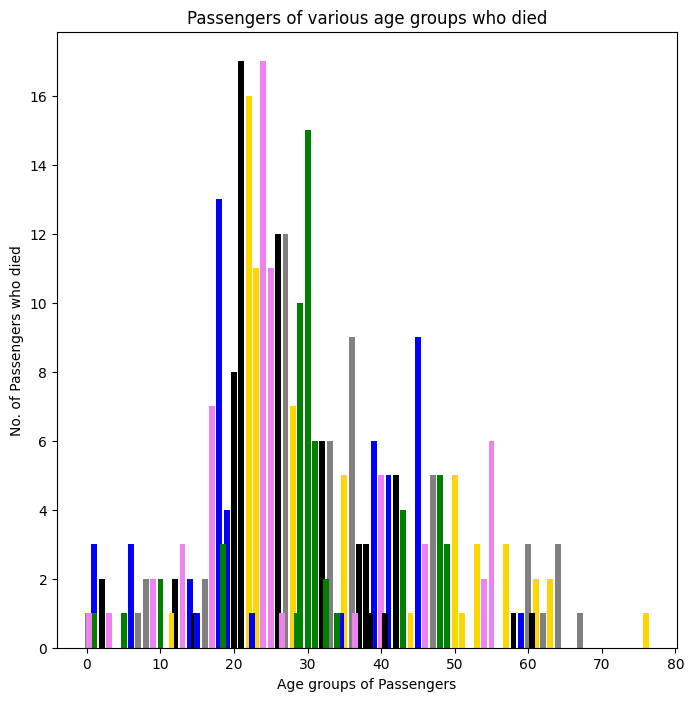

In [516]:
plt.figure(figsize=(8,8))
plt.xlabel("Age groups of Passengers")
plt.ylabel("No. of Passengers who died")
plt.title("Passengers of various age groups who died")
plt.bar(diffrent_age_group.keys(),tested['Age'].value_counts().values,color=['black','violet','gold','green','blue','grey'])
plt.show()

In [517]:
tested['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

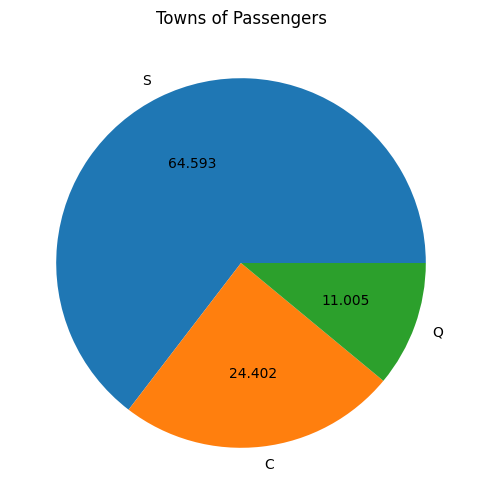

In [518]:
plt.figure(figsize=(6,6))
plt.title('Towns of Passengers')
plt.pie(tested['Embarked'].value_counts(),labels=['S','C','Q'],autopct='%1.03f')
plt.show()

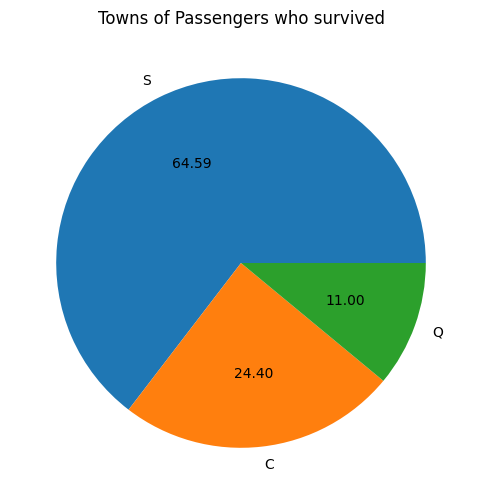

In [519]:
plt.figure(figsize=(6,6))
plt.title('Towns of Passengers who survived')
explode=(0,0.1,0)
plt.pie(tested['Embarked'].value_counts(),labels=['S','C','Q'],autopct='%1.02f')
plt.show()

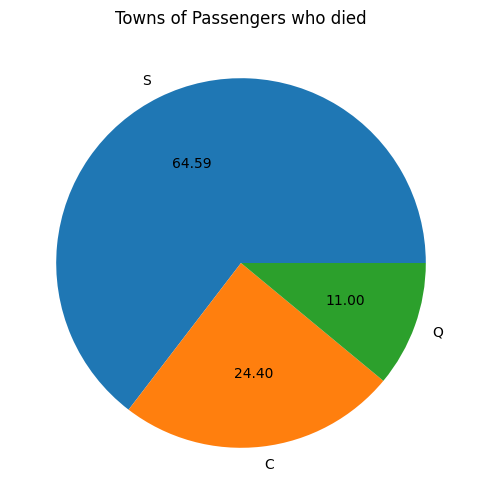

In [520]:
plt.figure(figsize=(6,6))
plt.title('Towns of Passengers who died')
explode=(0,0.1,0)
plt.pie(tested['Embarked'].value_counts(),labels=['S','C','Q'],autopct='%1.02f')
plt.show()

In [521]:
from pycaret.regression import*

ModuleNotFoundError: No module named 'pycaret'

In [526]:
reg_setup=setup(data=tested,target='Survived',session_id=123)
best_model=compare_models()
print(best_model)

NameError: name 'setup' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [524]:
label_encoder = LabelEncoder()
tested['Sex']=label_encoder.fit_transform(tested['Sex'])
tested['Embarked']=label_encoder.fit_transform(tested['Embarked'])
x=tested.drop('Survived',axis=1)
y=tested['Survived']
imputer=SimpleImputer(strategy='median')
x_imputed=imputer.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_imputed,y,test_size=0.2,random_state=42)
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))
print("Classification Report")  
print(clzssificatin_report(y_test,y_pred))      

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Anushka Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Anushka Singh\AppData\Local\Temp\ipykernel_18176\726796049.py", line 7, in <module>
    x_imputed=imputer.fit_transform(x)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Anushka Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    is manually disabled.
                       ^^^
  File "C:\Users\Anushka Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 916, in fit_transform
  File "C:\Users\Anushka Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py", line 380, in fit
    self._validate_params()
  File "C:\Users\Anushka Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\